<a href="https://colab.research.google.com/github/LeonardCT/palletsAndina/blob/main/Fallas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Oct 15 14:38:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import sys

In [ ]:
HOME= os.getcwd()
print("Home:",HOME)

Home: /content


In [ ]:
%cd {HOME}

!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-xc3pcx_8
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-xc3pcx_8
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=ed616ef69fd54d25e222e9157ade790ca9ee3b76e39239e253d3c6e039987994
  Stored in directory: /tmp/pip-ephem-wheel-cache-81lo53aw/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:

!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.2 MB/s eta 0:00:00


In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

/content
/content/weights


In [ ]:
CHECKPOINT_PATH= os.path.join(HOME, "weights",'sam_vit_h_4b8939.pth')
print(CHECKPOINT_PATH, ";exist", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ;exist True


In [ ]:
import torch
DEVICE= torch.device('cuda:0' if torch.cuda.is_available() else'cpu')
MODEL_TYPE='vit_h'

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [ ]:
mask_generator= SamAutomaticMaskGenerator(sam)

In [ ]:
import os

%cd {HOME}

IMAGE_NAME = "666.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

/content


In [ ]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


sam_result = mask_generator.generate(image_rgb)

error: ignored

In [ ]:
print(sam_result[0].keys())

In [ ]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)


mask_annotator = sv.MaskAnnotator(color_map='index')

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
filtered_results = [result for result in sam_result if result['area'] > 43000]

for result in filtered_results:
    area = result['area']
    print(f"Área del objeto: {area} píxeles")

Área del objeto: 44094 píxeles
Área del objeto: 44414 píxeles
Área del objeto: 44907 píxeles
Área del objeto: 44251 píxeles
Área del objeto: 46456 píxeles
Área del objeto: 45923 píxeles
Área del objeto: 45871 píxeles
Área del objeto: 46612 píxeles
Área del objeto: 45904 píxeles
Área del objeto: 46120 píxeles
Área del objeto: 46595 píxeles
Área del objeto: 46825 píxeles
Área del objeto: 93472 píxeles


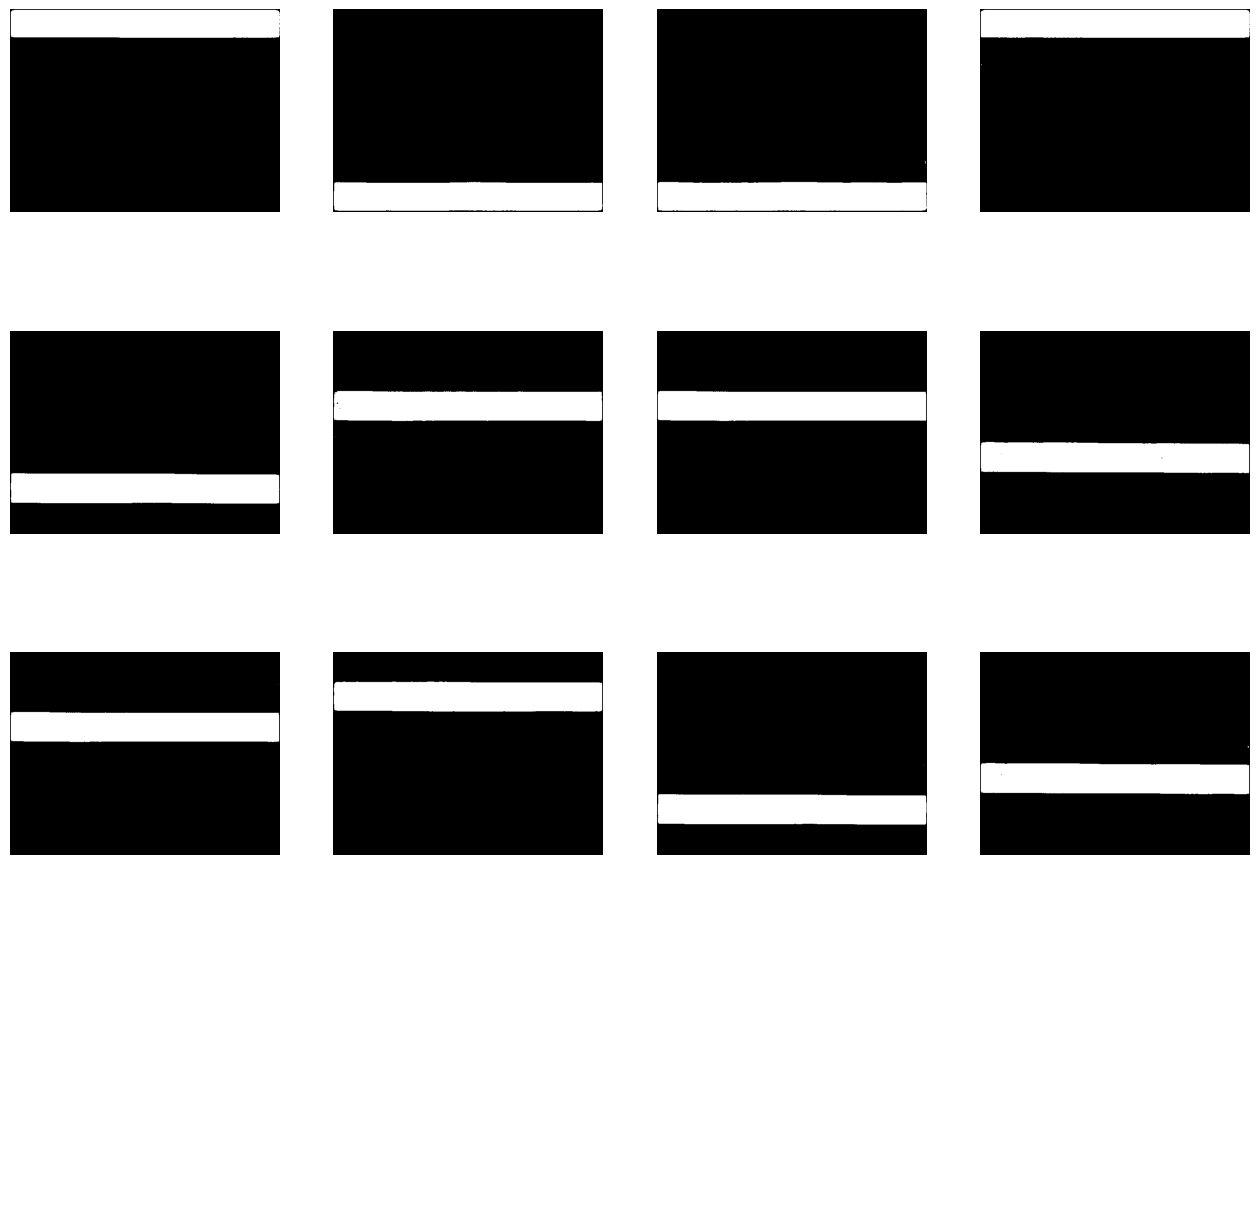

In [ ]:
import math
import supervision as sv

# ...

# Filtra las segmentaciones según el área
filtered_results = [result for result in sam_result if 43000 < result['area'] <= 50000]

# Obtén las máscaras de las segmentaciones filtradas
filtered_masks = [result['segmentation'] for result in filtered_results]

# Calcula el tamaño de la cuadrícula para mostrar las máscaras
grid_size_dimension = math.ceil(math.sqrt(len(filtered_masks)))

# Muestra solo las máscaras que cumplen con el criterio de área en una cuadrícula
sv.plot_images_grid(images=filtered_masks, grid_size=(grid_size_dimension, grid_size_dimension), size=(16, 16))



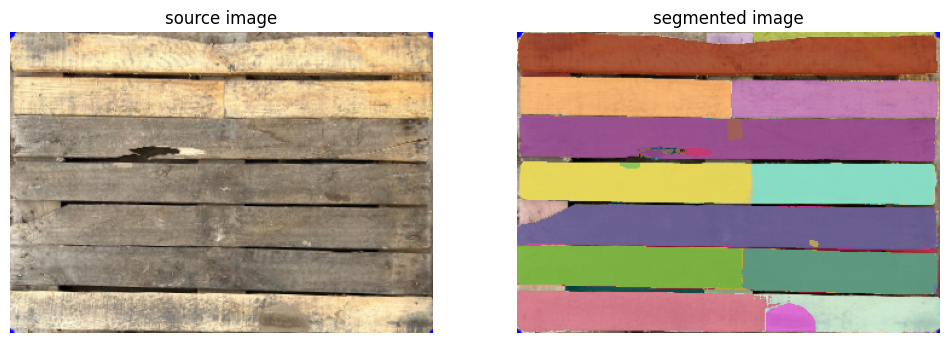

In [ ]:
import cv2
import supervision as sv
IMAGE_NAME = "output_image.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)


mask_annotator = sv.MaskAnnotator(color_map='index')

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
filtered_results = [result for result in sam_result if result['area'] > 10000]

for result in filtered_results:
    area = result['area']
    print(f"Área del objeto: {area} píxeles")

Área del objeto: 10676 píxeles
Área del objeto: 11252 píxeles
Área del objeto: 11792 píxeles
Área del objeto: 11808 píxeles
Área del objeto: 11192 píxeles
Área del objeto: 10957 píxeles
Área del objeto: 11431 píxeles
Área del objeto: 10119 píxeles
Área del objeto: 10655 píxeles
Área del objeto: 11324 píxeles
Área del objeto: 11321 píxeles
Área del objeto: 11533 píxeles
Área del objeto: 11579 píxeles
Área del objeto: 11291 píxeles
Área del objeto: 10632 píxeles
Área del objeto: 23847 píxeles


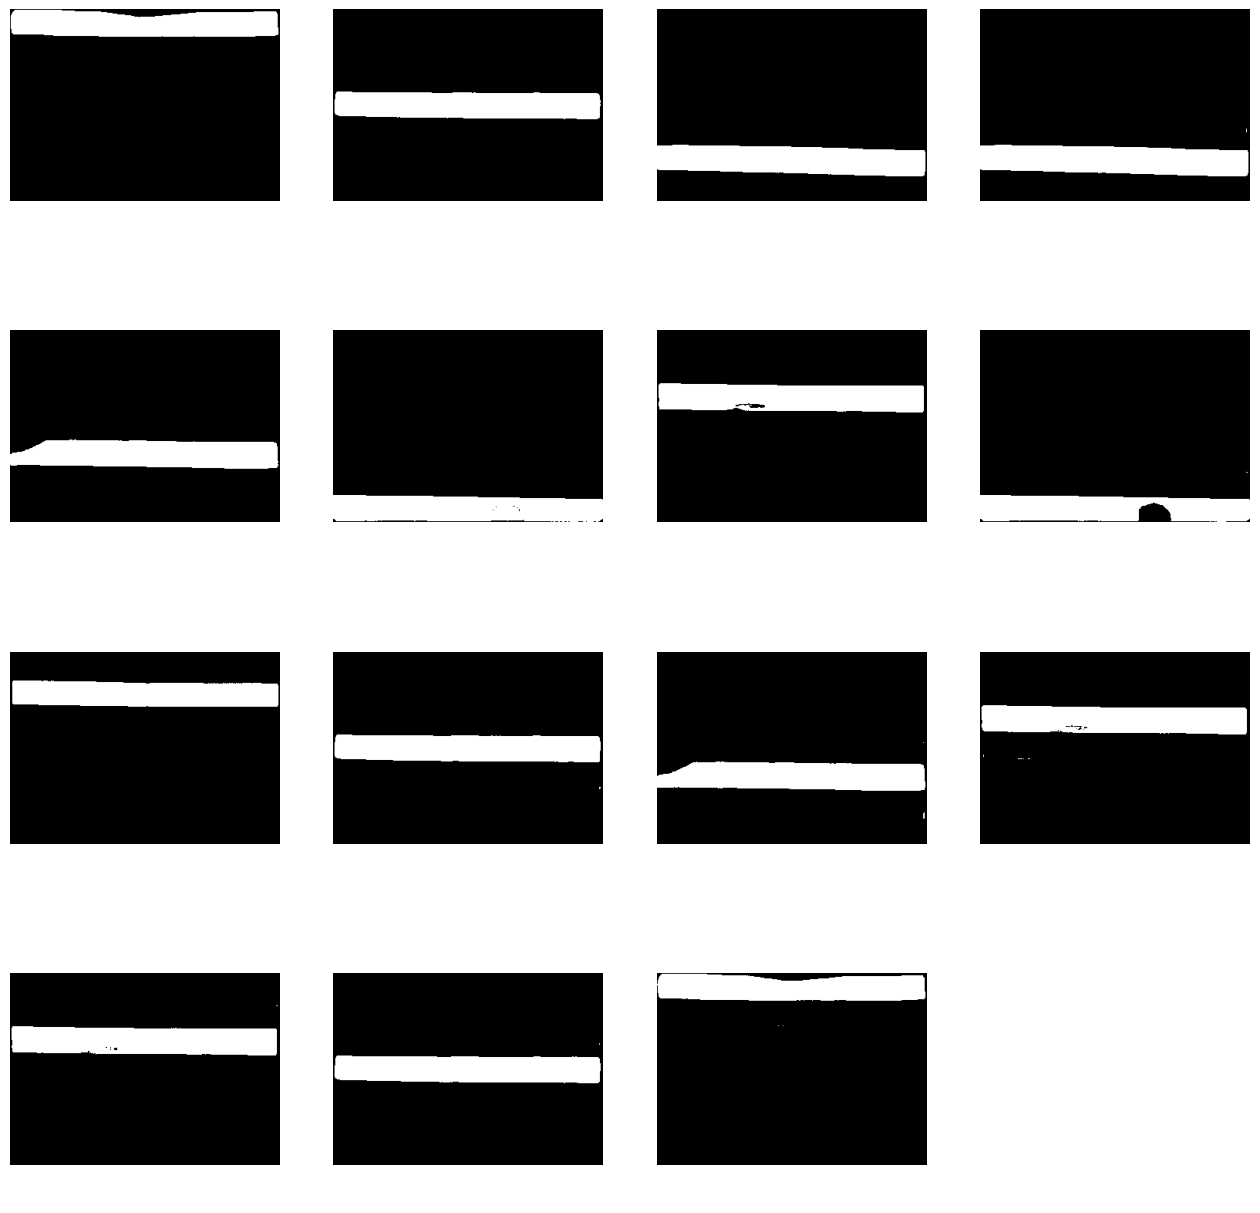

In [ ]:
import math
import supervision as sv

# ...

# Filtra las segmentaciones según el área
filtered_results = [result for result in sam_result if 10000 < result['area'] <= 15000]



# Obtén las máscaras de las segmentaciones filtradas
filtered_masks = [result['segmentation'] for result in filtered_results]

# Calcula el tamaño de la cuadrícula para mostrar las máscaras
grid_size_dimension = math.ceil(math.sqrt(len(filtered_masks)))

# Muestra solo las máscaras que cumplen con el criterio de área en una cuadrícula
sv.plot_images_grid(images=filtered_masks, grid_size=(grid_size_dimension, grid_size_dimension), size=(16, 16))


In [ ]:

def get_mask(segmentation):
  """Obtiene la máscara de una segmentación."""
  mask = np.zeros_like(segmentation)
  mask[segmentation] = 1
  return mask

def is_convex(segmentation):
  """Verifica si la máscara representa un objeto convexo."""
  mask = get_mask(segmentation)
  mask = cv2.UMat(mask.shape[0], mask.shape[1], mask.dtype)
  cnt = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]
  return cv2.isContourConvex(cnt)



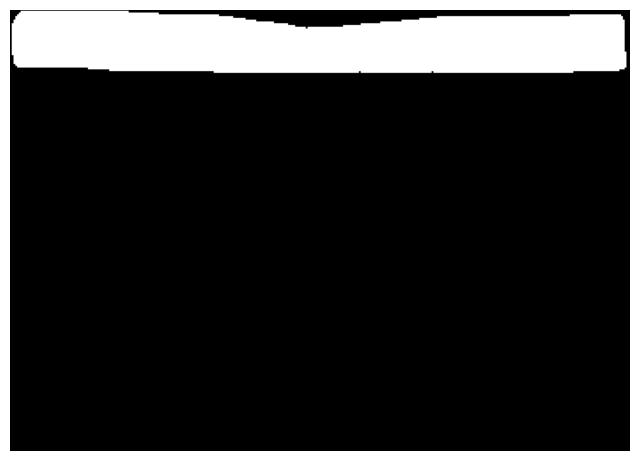

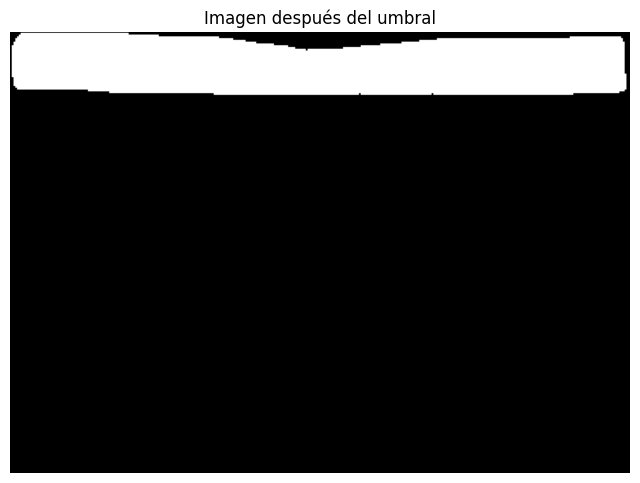

Number of contours: 1
Convexity: False
Imagen 0


In [ ]:
import math
import supervision as sv
import numpy as np
import matplotlib.pyplot as plt

# ...

# Filtra las segmentaciones según el área
filtered_results = [result for result in sam_result if 10000 < result['area'] <= 15000]

# Obtén las máscaras de las segmentaciones filtradas
filtered_masks = [result['segmentation'] for result in filtered_results]

# Calcula el tamaño de la cuadrícula para mostrar las máscaras
grid_size_dimension = math.ceil(math.sqrt(len(filtered_masks)))


# Muestra solo las máscaras que cumplen con el criterio de área en una cuadrícula
i=0
for mask in filtered_masks:
  sv.plot_image(mask, size=(8, 8))

  img= mask.astype(np.uint8) * 255
  ret, thresh = cv2.threshold(img, 250, 300, 0)
  plt.figure(figsize=(8, 8))
  plt.imshow(thresh, cmap='gray')
  plt.title("Imagen después del umbral")
  plt.axis('off')
  plt.show()

  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  print("Number of contours:", len(contours))
  cnt = contours[0]
  k = cv2.isContourConvex(cnt)
  print("Convexity:", k)
  print("Imagen",i)

  i=i+1
  break

